# **Exploratory Data Analysis (EDA) on Retail Sales Data**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px


**Load the CSV Files**

In [2]:
# Load menu.csv
menu_df = pd.read_csv(r"C:\Users\Rohan\Desktop\Datasets\menu.csv", encoding='unicode_escape')
# Load Supermart Grocery sales dataset
sales_df = pd.read_csv(r"C:\Users\Rohan\Desktop\Datasets\Supermart Grocery Sales - Retail Analytics Dataset.csv" , encoding='unicode_escape')


**Data Overview**

In [3]:
# View first few rows of menu.csv
menu_df.head()

# View first few rows of sales dataset
sales_df.head()

# Summary of menu.csv
menu_df.info()

# Summary of sales dataset
sales_df.info()

# Basic statistics for numerical columns in menu.csv
menu_df.describe()

# Basic statistics for numerical columns in sales dataset
sales_df.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 260 entries, 0 to 259
Data columns (total 24 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Category                       260 non-null    object 
 1   Item                           260 non-null    object 
 2   Serving Size                   260 non-null    object 
 3   Calories                       260 non-null    int64  
 4   Calories from Fat              260 non-null    int64  
 5   Total Fat                      260 non-null    float64
 6   Total Fat (% Daily Value)      260 non-null    int64  
 7   Saturated Fat                  260 non-null    float64
 8   Saturated Fat (% Daily Value)  260 non-null    int64  
 9   Trans Fat                      260 non-null    float64
 10  Cholesterol                    260 non-null    int64  
 11  Cholesterol (% Daily Value)    260 non-null    int64  
 12  Sodium                         260 non-null    int

,Sales,Discount,Profit
count,9994.000000,9994.000000,9994.000000
mean,1496.596158,0.226817,374.937082
std,577.559036,0.074636,239.932881
min,500.000000,0.100000,25.250000
25%,1000.000000,0.160000,180.022500
50%,1498.000000,0.230000,320.780000
75%,1994.750000,0.290000,525.627500
max,2500.000000,0.350000,1120.950000


**Data Cleaning**

In [4]:
# Check for missing values in menu.csv
menu_df.isnull().sum()

# Check for missing values in sales dataset
sales_df.isnull().sum()

# Dropping any rows with missing values (if necessary)
menu_df.dropna(inplace=True)
sales_df.dropna(inplace=True)


**Exploratory Data Analysis (EDA)**

**i) Menu Dataset Analysis**

**a) Calories Distribution**

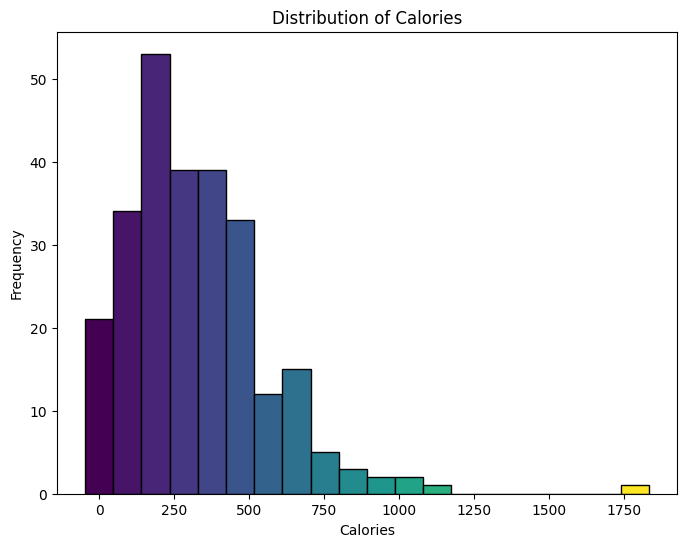

In [5]:
# Histogram of Calories
# Histogram of Calories with colormap
# Generate a list of colors
# Create a colormap
# Calculate histogram values
counts, bins = np.histogram(menu_df['Calories'], bins=20)

# Create a colormap with 20 distinct colors
colors = plt.cm.viridis(np.linspace(0, 1, len(counts)))

# Plot each bar with a different color
plt.figure(figsize=(8, 6))
for count, x, color in zip(counts, bins[:-1], colors):
    plt.bar(x, count, width=np.diff(bins)[0], color=color, edgecolor='black')

plt.title('Distribution of Calories')
plt.xlabel('Calories')
plt.ylabel('Frequency')
plt.show()

**b)Total Fat vs Calories Scatter Plot**

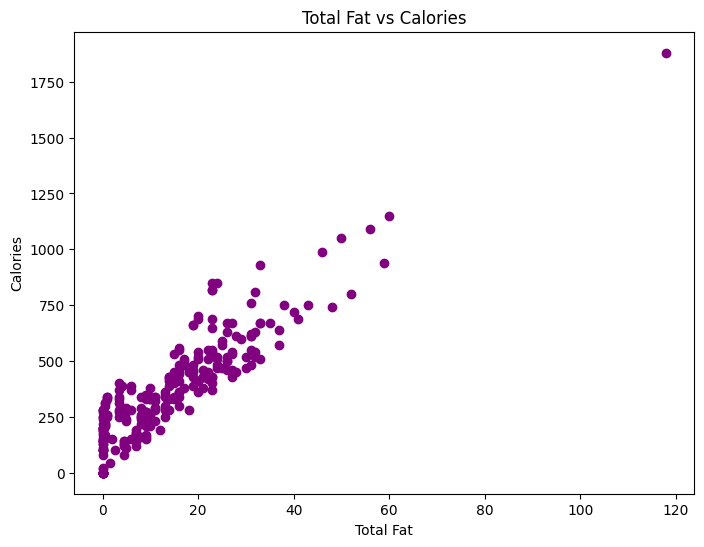

In [6]:
plt.figure(figsize=(8,6))
plt.scatter(menu_df['Total Fat'], menu_df['Calories'], color='purple')
plt.title('Total Fat vs Calories')
plt.xlabel('Total Fat')
plt.ylabel('Calories')
plt.show()


**c)Calories from Fat Distribution**

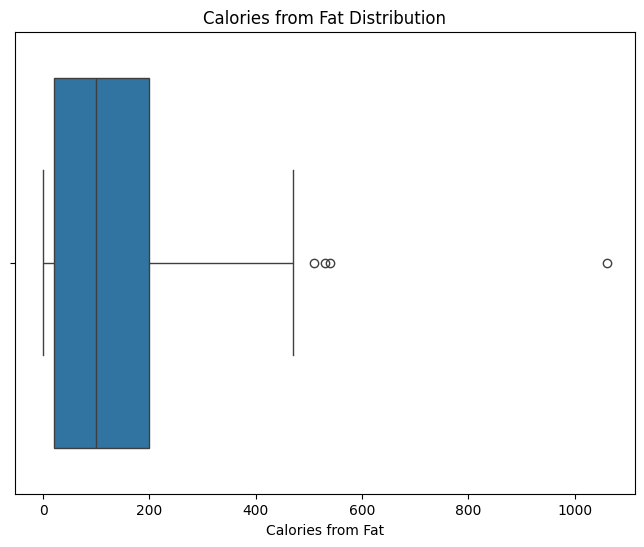

In [7]:
# Boxplot for Calories from Fat
plt.figure(figsize=(8, 6))
sns.boxplot(x=menu_df['Calories from Fat'])  # Seaborn chooses the default color
plt.title('Calories from Fat Distribution')
plt.show()

**d)Correlations Heatmap**

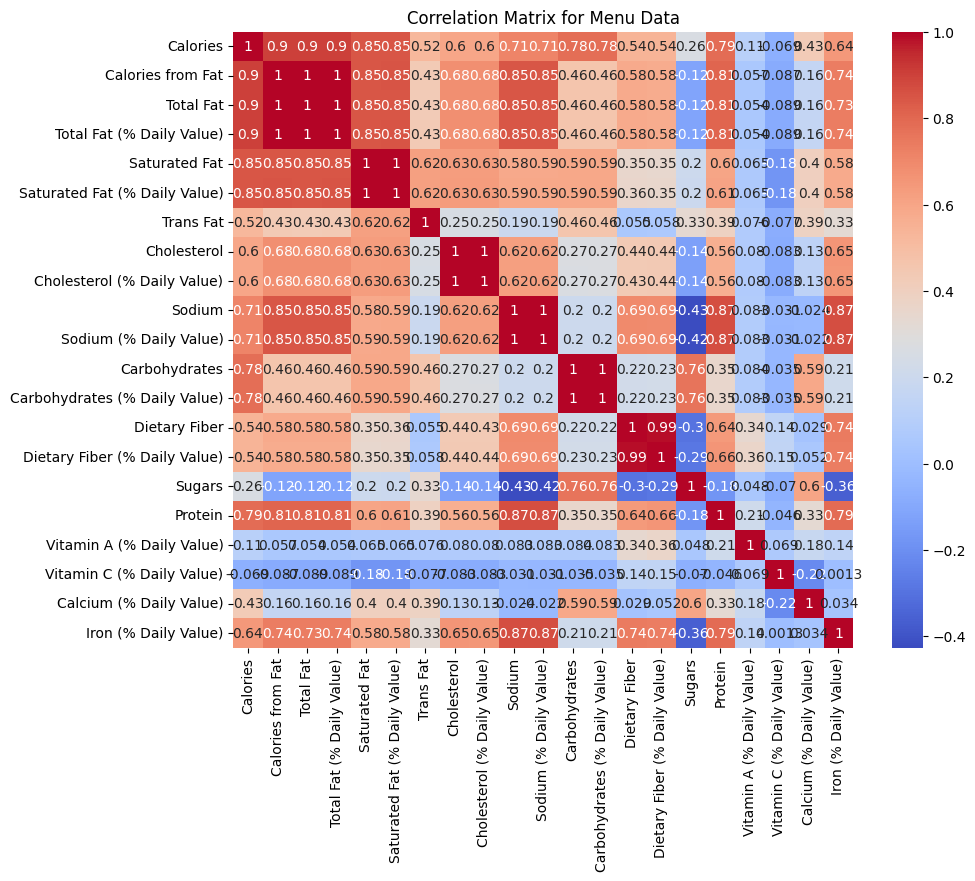

In [8]:
# Filter for numeric columns only
numeric_menu_df = menu_df.select_dtypes(include=['float64', 'int64'])

# Calculate the correlation matrix
correlation_matrix = numeric_menu_df.corr()

# Create the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix for Menu Data')
plt.show()


**ii)Supermart Grocery Sales Dataset Analysis**

**a)Sales Distribution**

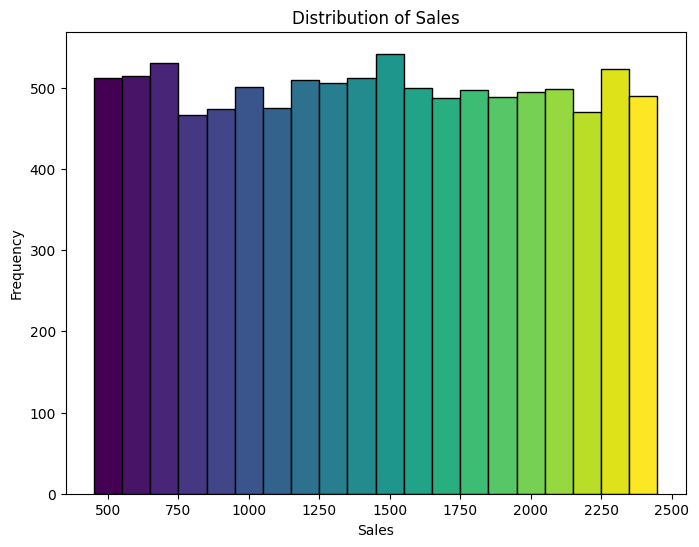

In [9]:
# Histogram of Sales
# Calculate histogram values
counts, bins = np.histogram(sales_df['Sales'], bins=20)

# Create a colormap with 20 distinct colors
colors = plt.cm.viridis(np.linspace(0, 1, len(counts)))

# Plot each bar with a different color
plt.figure(figsize=(8, 6))
for count, x, color in zip(counts, bins[:-1], colors):
    plt.bar(x, count, width=np.diff(bins)[0], color=color, edgecolor='black')

plt.title('Distribution of Sales')
plt.xlabel('Sales')
plt.ylabel('Frequency')
plt.show()


**b)Profit vs Discount Scatter Plot**

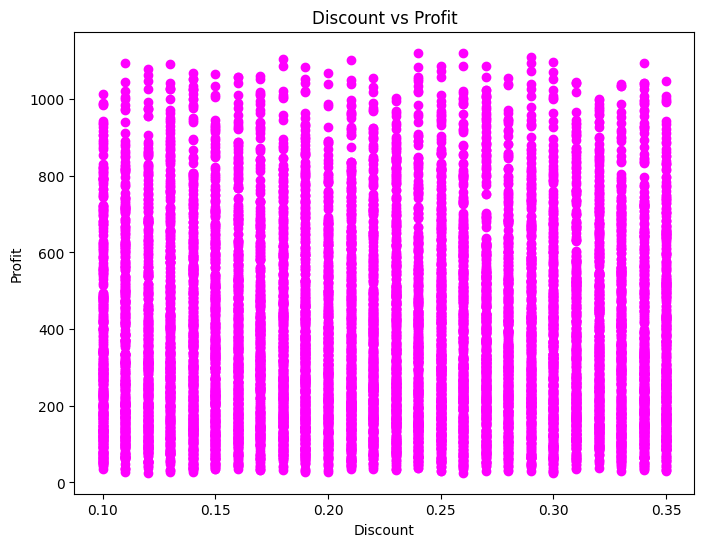

In [10]:
plt.figure(figsize=(8,6))
plt.scatter(sales_df['Discount'], sales_df['Profit'], color='magenta')
plt.title('Discount vs Profit')
plt.xlabel('Discount')
plt.ylabel('Profit')
plt.show()


**c)Sales by Category Bar Plot**

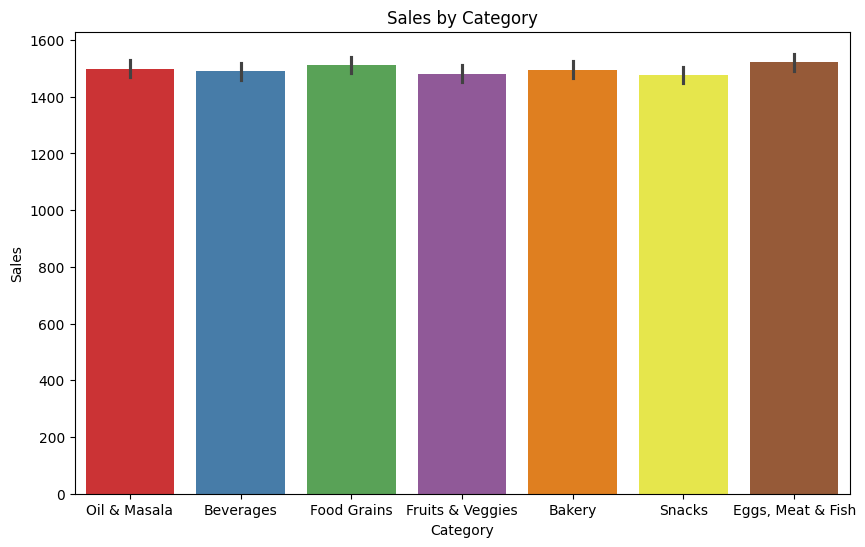

In [11]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Category', y='Sales', hue='Category', data=sales_df, palette='Set1', legend=False)  # Added hue
plt.title('Sales by Category')
plt.show()


**Ensure DataFrame is Not Empty**

In [12]:
print(sales_df.head())  # Display the first few rows of the DataFrame
print(sales_df.info())  # Display DataFrame information including number of rows


  ï»¿Order ID Customer Name          Category      Sub Category         City  \
0         OD1        Harish      Oil & Masala           Masalas      Vellore   
1         OD2         Sudha         Beverages     Health Drinks  Krishnagiri   
2         OD3       Hussain       Food Grains      Atta & Flour   Perambalur   
3         OD4       Jackson  Fruits & Veggies  Fresh Vegetables   Dharmapuri   
4         OD5       Ridhesh       Food Grains   Organic Staples         Ooty   

   Order Date Region  Sales  Discount  Profit       State  
0  11-08-2017  North   1254      0.12  401.28  Tamil Nadu  
1  11-08-2017  South    749      0.18  149.80  Tamil Nadu  
2  06-12-2017   West   2360      0.21  165.20  Tamil Nadu  
3  10-11-2016  South    896      0.25   89.60  Tamil Nadu  
4  10-11-2016  South   2355      0.26  918.45  Tamil Nadu  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ---

**Check for Null or NaN Values**

In [13]:
print(sales_df['Region'].isnull().sum())  # Check for NaN in Region
print(sales_df['Sales'].isnull().sum())   # Check for NaN in Sales


0
0


**d.1)Sales by Region Bar Graph**

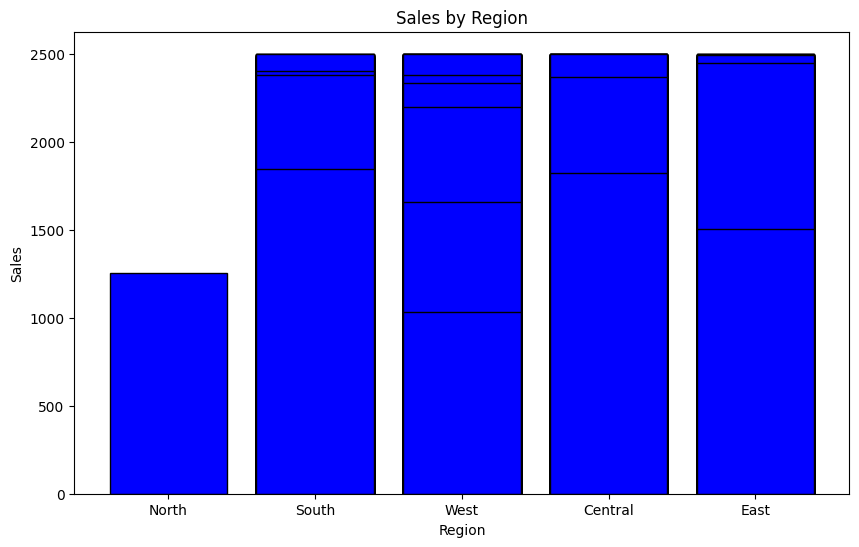

In [14]:
plt.figure(figsize=(10, 6))
plt.bar(sales_df['Region'], sales_df['Sales'], color='blue', edgecolor='black')
plt.title('Sales by Region')
plt.xlabel('Region')
plt.ylabel('Sales')
plt.show()

**d.2)Sales by Region Line Chart**

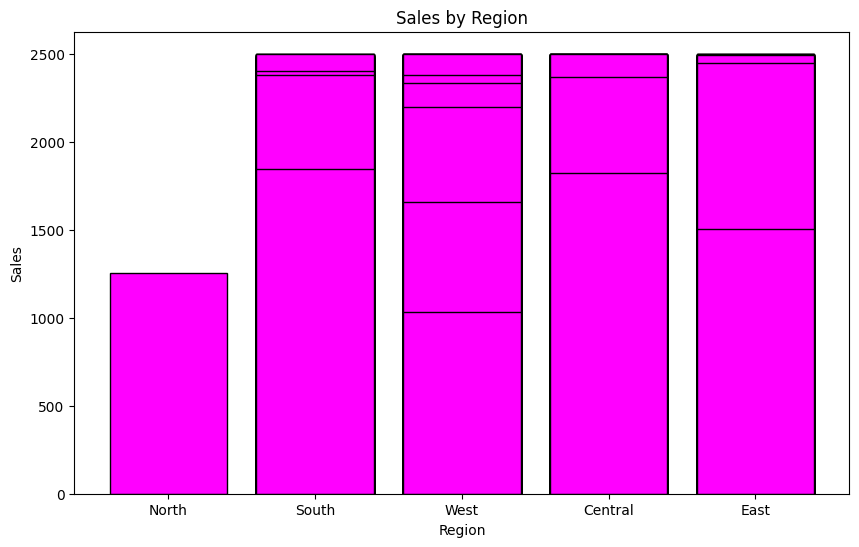

In [15]:
plt.figure(figsize=(10, 6))
plt.bar(sales_df['Region'], sales_df['Sales'], color='fuchsia', edgecolor='black')
plt.title('Sales by Region')
plt.xlabel('Region')
plt.ylabel('Sales')
plt.show()

**e)Sales Over Time**

In [16]:
# Print the first few rows of the DataFrame
print(sales_df.head())

  ï»¿Order ID Customer Name          Category      Sub Category         City  \
0         OD1        Harish      Oil & Masala           Masalas      Vellore   
1         OD2         Sudha         Beverages     Health Drinks  Krishnagiri   
2         OD3       Hussain       Food Grains      Atta & Flour   Perambalur   
3         OD4       Jackson  Fruits & Veggies  Fresh Vegetables   Dharmapuri   
4         OD5       Ridhesh       Food Grains   Organic Staples         Ooty   

   Order Date Region  Sales  Discount  Profit       State  
0  11-08-2017  North   1254      0.12  401.28  Tamil Nadu  
1  11-08-2017  South    749      0.18  149.80  Tamil Nadu  
2  06-12-2017   West   2360      0.21  165.20  Tamil Nadu  
3  10-11-2016  South    896      0.25   89.60  Tamil Nadu  
4  10-11-2016  South   2355      0.26  918.45  Tamil Nadu  


In [17]:
# Print unique values in the 'Order Date' column
print(sales_df['Order Date'].unique())


['11-08-2017' '06-12-2017' '10-11-2016' ... '3/16/2015' '8/29/2016'
 '04-06-2017']


In [18]:
sales_df['Order Date'] = pd.to_datetime(sales_df['Order Date'], format='%m/%d/%Y', errors='coerce')


In [19]:
sales_df['Order Date'] = pd.to_datetime(sales_df['Order Date'], format='%Y-%m-%d', errors='coerce')


In [20]:
sales_df['Order Date'] = pd.to_datetime(sales_df['Order Date'], errors='coerce')


In [21]:
# Check for any NaT values in 'Order Date'
print(sales_df[sales_df['Order Date'].isna()])


     ï»¿Order ID Customer Name          Category      Sub Category  \
0            OD1        Harish      Oil & Masala           Masalas   
1            OD2         Sudha         Beverages     Health Drinks   
2            OD3       Hussain       Food Grains      Atta & Flour   
3            OD4       Jackson  Fruits & Veggies  Fresh Vegetables   
4            OD5       Ridhesh       Food Grains   Organic Staples   
...          ...           ...               ...               ...   
9983      OD9984          Peer       Food Grains              Rice   
9986      OD9987          Peer            Bakery          Biscuits   
9988      OD9989       Jackson            Snacks           Cookies   
9990      OD9991          Alan            Bakery          Biscuits   
9991      OD9992          Ravi       Food Grains              Rice   

             City Order Date Region  Sales  Discount  Profit       State  
0         Vellore        NaT  North   1254      0.12  401.28  Tamil Nadu  
1     Kri

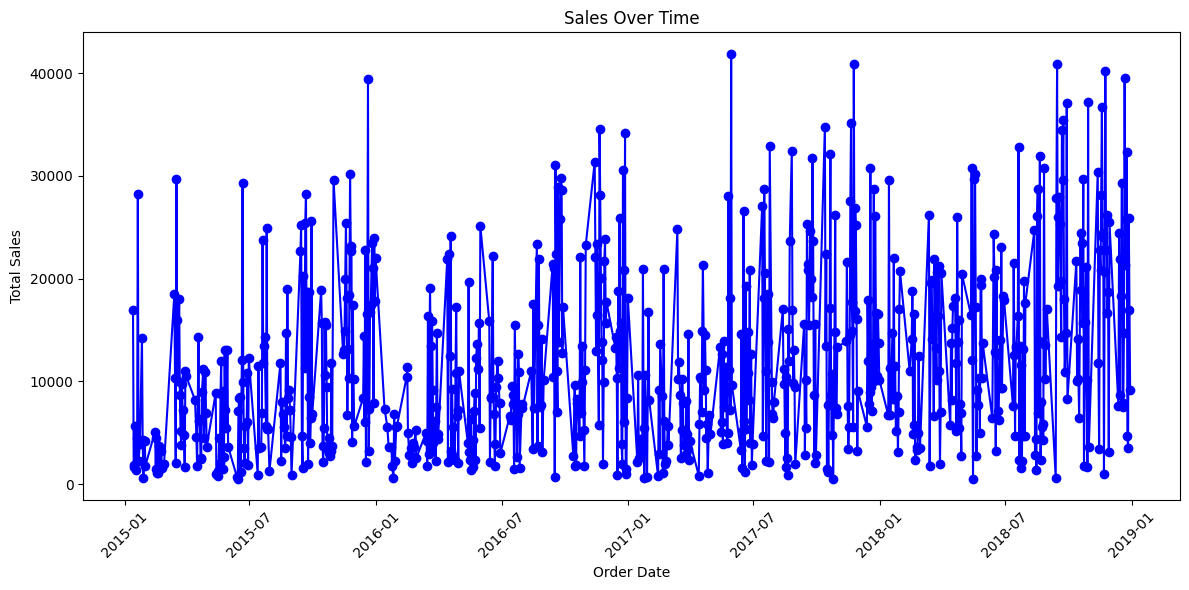

In [22]:
# Group data by Order Date and sum Sales
sales_over_time = sales_df.groupby('Order Date')['Sales'].sum().reset_index()

# Plotting the data
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(sales_over_time['Order Date'], sales_over_time['Sales'], color='blue', marker='o')
plt.title('Sales Over Time')
plt.xlabel('Order Date')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.tight_layout()  # To avoid clipping of labels
plt.show()


**Advanced Visualizations**

**1.Sales and Profit by State with matplotlib**

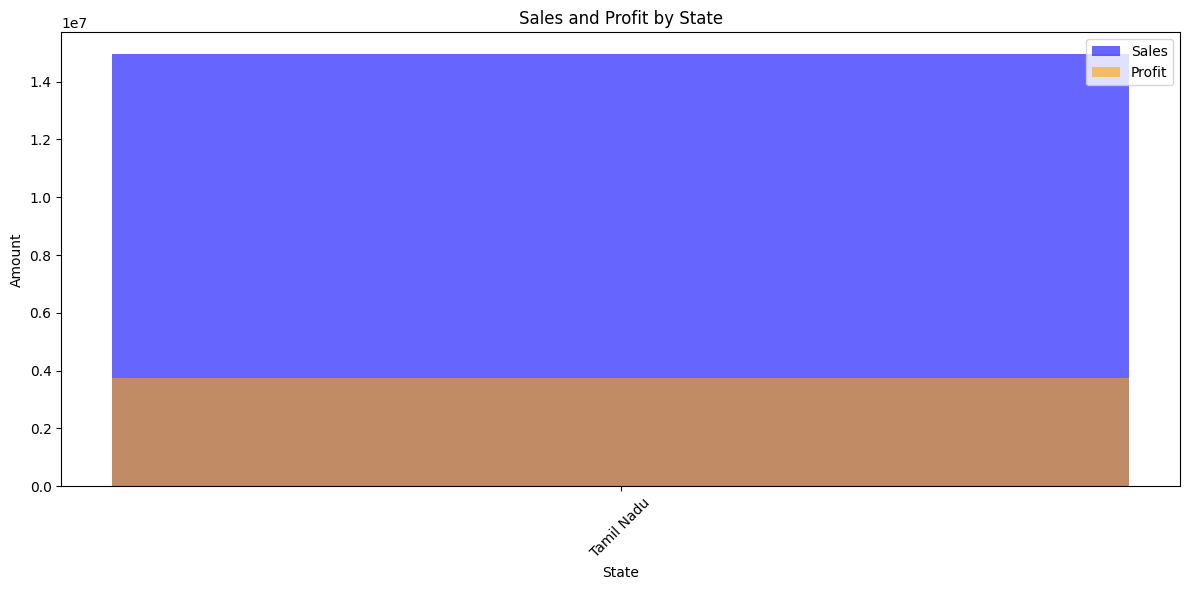

In [23]:
import matplotlib.pyplot as plt

# Ensure to group data by State to get total Sales and Profit
state_grouped = sales_df.groupby('State')[['Sales', 'Profit']].sum().reset_index()

# Plotting with Matplotlib
plt.figure(figsize=(12, 6))
plt.bar(state_grouped['State'], state_grouped['Sales'], color='blue', label='Sales', alpha=0.6)
plt.bar(state_grouped['State'], state_grouped['Profit'], color='orange', label='Profit', alpha=0.6)
plt.title('Sales and Profit by State')
plt.xlabel('State')
plt.ylabel('Amount')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()



**2.Heatmap for Correlation in Sales Dataset**

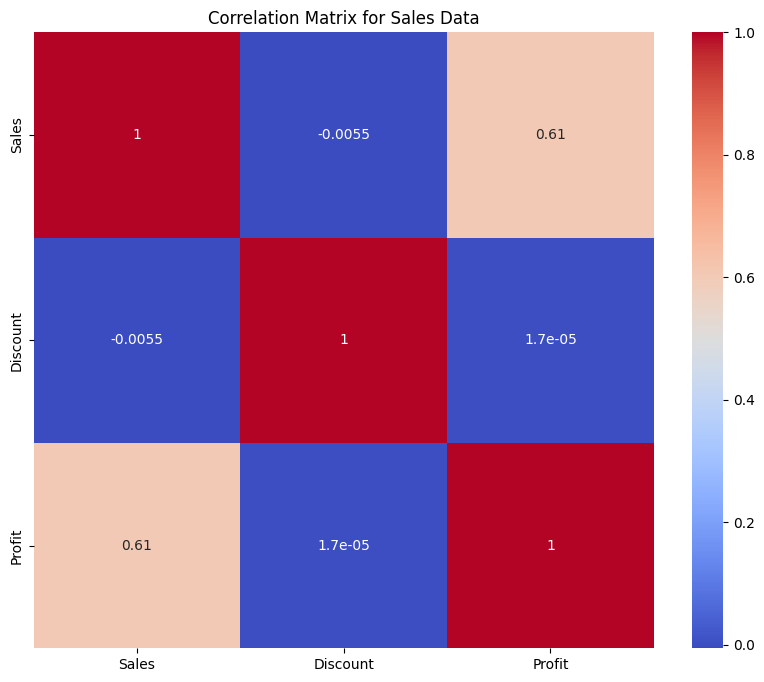

In [24]:
# Select only numeric columns
numeric_df = sales_df.select_dtypes(include=['number'])

# Calculate the correlation matrix
correlation_matrix = numeric_df.corr()

# Create the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix for Sales Data')
plt.show()


**Summary Statistics and Aggregation**

In [25]:
import pandas as pd
sales_df = pd.read_csv(r"C:\Users\Rohan\Desktop\Datasets\Supermart Grocery Sales - Retail Analytics Dataset.csv" , encoding='unicode_escape')
print(sales_df.head())  # Display the first few rows of the DataFrame


  ï»¿Order ID Customer Name          Category      Sub Category         City  \
0         OD1        Harish      Oil & Masala           Masalas      Vellore   
1         OD2         Sudha         Beverages     Health Drinks  Krishnagiri   
2         OD3       Hussain       Food Grains      Atta & Flour   Perambalur   
3         OD4       Jackson  Fruits & Veggies  Fresh Vegetables   Dharmapuri   
4         OD5       Ridhesh       Food Grains   Organic Staples         Ooty   

   Order Date Region  Sales  Discount  Profit       State  
0  11-08-2017  North   1254      0.12  401.28  Tamil Nadu  
1  11-08-2017  South    749      0.18  149.80  Tamil Nadu  
2  06-12-2017   West   2360      0.21  165.20  Tamil Nadu  
3  10-11-2016  South    896      0.25   89.60  Tamil Nadu  
4  10-11-2016  South   2355      0.26  918.45  Tamil Nadu  


In [26]:
# Aggregating sales by region
region_sales = sales_df.groupby('Region')['Sales'].sum()
print(region_sales)

# Average discount per category
category_discount = sales_df.groupby('Category')['Discount'].mean()
print(category_discount)


Region
Central    3468156
East       4248368
North         1254
South      2440461
West       4798743
Name: Sales, dtype: int64
Category
Bakery               0.225428
Beverages            0.230329
Eggs, Meat & Fish    0.227792
Food Grains          0.228548
Fruits & Veggies     0.229295
Oil & Masala         0.224526
Snacks               0.222048
Name: Discount, dtype: float64


**Save Cleaned Data**

In [27]:
menu_df = pd.read_csv(r"C:\Users\Rohan\Desktop\Datasets\menu.csv", encoding='unicode_escape')
menu_df.to_csv('cleaned_menu.csv', index=False)
sales_df.to_csv('cleaned_sales.csv', index=False)


**Additional Analysis for menu.csv**

**1.Calories vs. Sugars and Proteins (Pair Plot)**

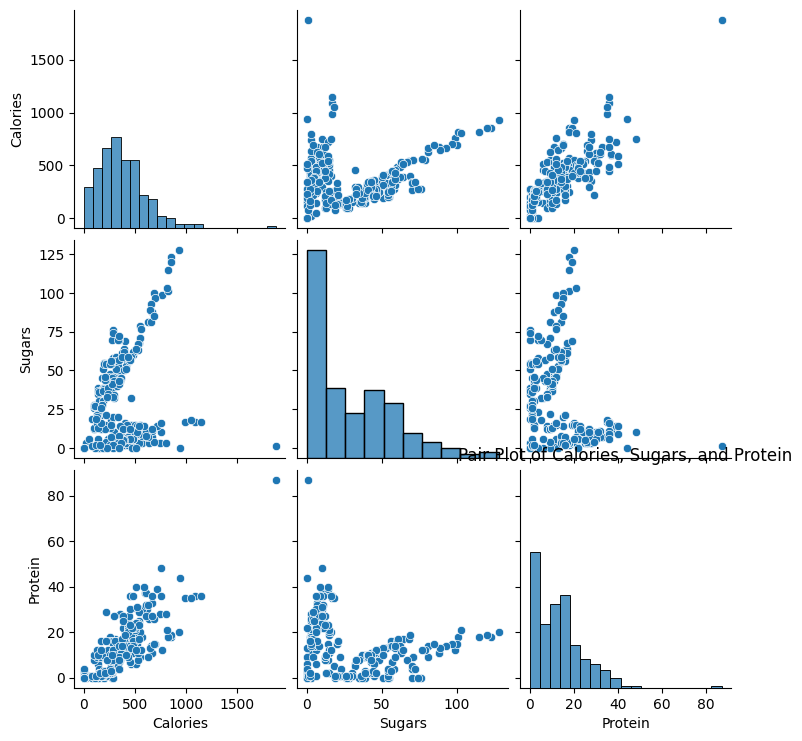

In [28]:
# Pairplot for Calories, Sugars, and Proteins
import matplotlib.pyplot as plt
import seaborn as sns
sns.pairplot(menu_df[['Calories', 'Sugars', 'Protein']])
plt.title('Pair Plot of Calories, Sugars, and Protein')
plt.show()


**2.Grouped Bar Plot for Nutritional Content by Item**

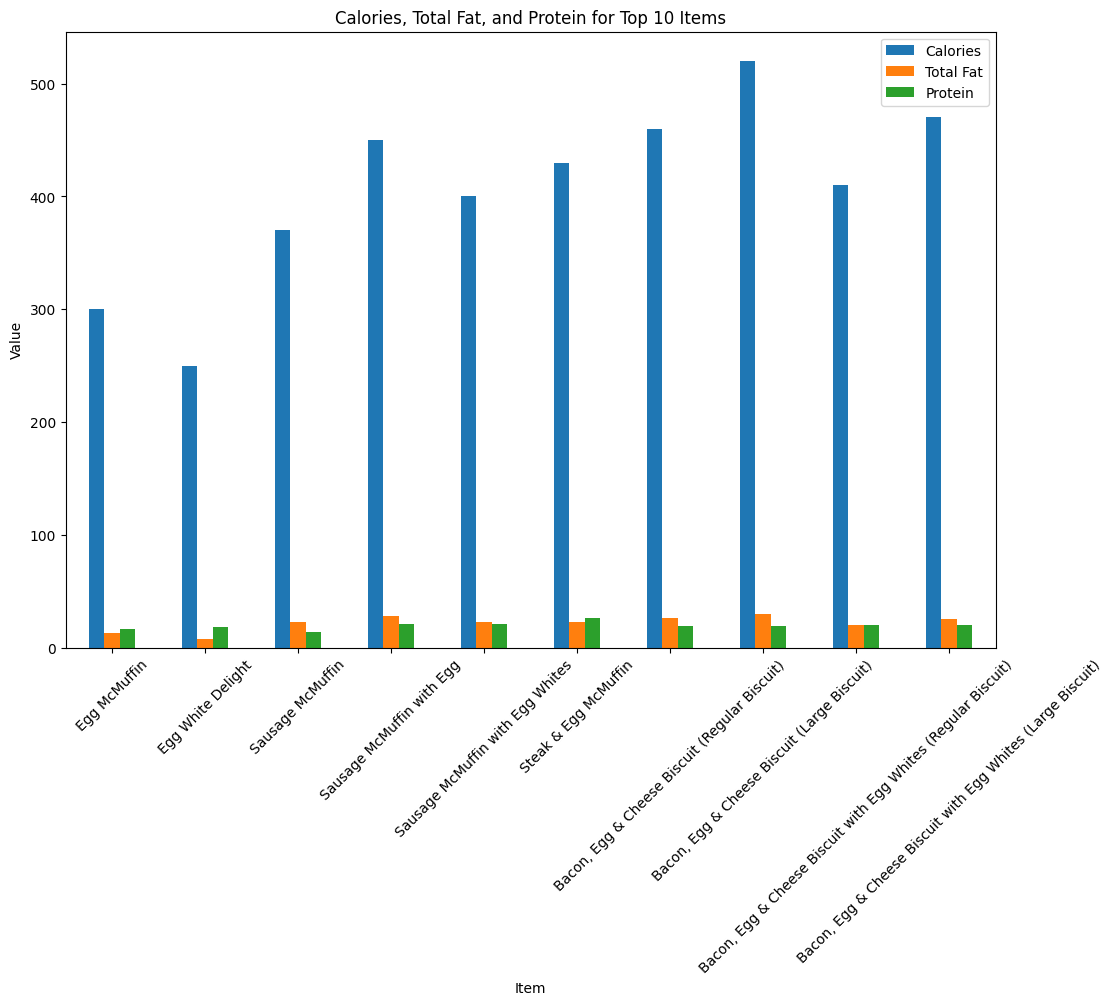

In [29]:
# Bar plot comparing Calories, Fat, and Protein for top 10 items
menu_subset = menu_df.head(10)

menu_subset.plot(x='Item', y=['Calories', 'Total Fat', 'Protein'], kind='bar', figsize=(12,8))
plt.title('Calories, Total Fat, and Protein for Top 10 Items')
plt.ylabel('Value')
plt.xticks(rotation=45)
plt.show()


**3.Treemap for Vitamin A and C Daily Values**

In [30]:
pip install squarify


Note: you may need to restart the kernel to use updated packages.


In [31]:
import matplotlib.font_manager as fm
fm.findSystemFonts(fontpaths=None, fontext='ttf')




['C:\\Windows\\Fonts\\LBRITE.TTF',
 'C:\\Windows\\Fonts\\trebuc.ttf',
 'C:\\Windows\\Fonts\\consolaz.ttf',
 'C:\\Windows\\Fonts\\VIVALDII.TTF',
 'C:\\Windows\\Fonts\\malgunsl.ttf',
 'C:\\Windows\\Fonts\\BAUHS93.TTF',
 'C:\\Windows\\Fonts\\TCCEB.TTF',
 'C:\\Windows\\Fonts\\seguisym.ttf',
 'C:\\Windows\\Fonts\\CALIFB.TTF',
 'C:\\Windows\\Fonts\\CALISTI.TTF',
 'C:\\Windows\\Fonts\\CENSCBK.TTF',
 'C:\\Windows\\Fonts\\calibriz.ttf',
 'C:\\Windows\\Fonts\\NirmalaS.ttf',
 'C:\\Windows\\Fonts\\CALIST.TTF',
 'C:\\Windows\\Fonts\\segmdl2.ttf',
 'C:\\Windows\\Fonts\\LFAXD.TTF',
 'C:\\Windows\\Fonts\\ERASDEMI.TTF',
 'C:\\Windows\\Fonts\\SCHLBKB.TTF',
 'C:\\Windows\\Fonts\\wingding.ttf',
 'C:\\Windows\\Fonts\\GOUDOSI.TTF',
 'C:\\Windows\\Fonts\\ROCC____.TTF',
 'C:\\Windows\\Fonts\\georgiab.ttf',
 'C:\\Windows\\Fonts\\COOPBL.TTF',
 'C:\\Windows\\Fonts\\FRABKIT.TTF',
 'C:\\Windows\\Fonts\\GILBI___.TTF',
 'C:\\Windows\\Fonts\\mmrtext.ttf',
 'C:\\Windows\\Fonts\\MATURASC.TTF',
 'C:\\Windows\\Fonts\\tai

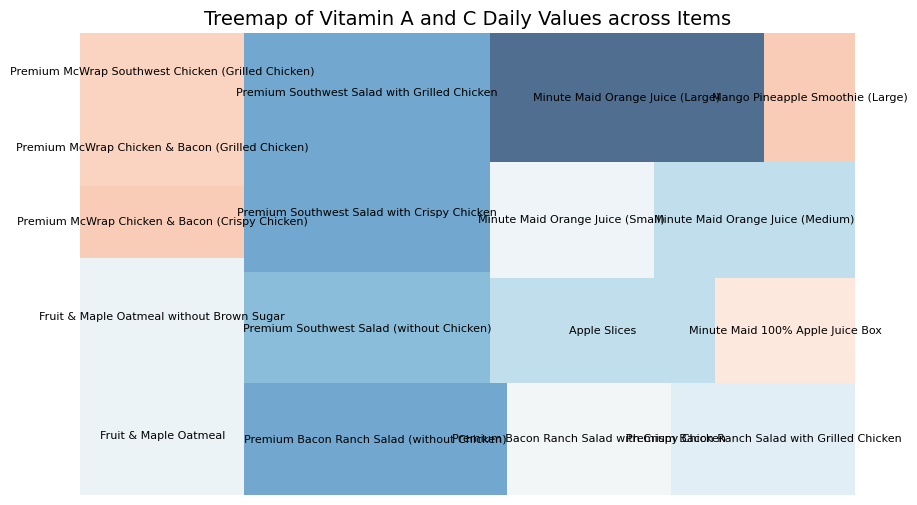

In [32]:
import matplotlib.pyplot as plt
import squarify
import numpy as np

# Combine Vitamin A and Vitamin C values
values = menu_df['Vitamin A (% Daily Value)'] + menu_df['Vitamin C (% Daily Value)']

# Filter out rows with zero combined vitamin values
non_zero_values = values[values > 0]
non_zero_items = menu_df['Item'][values > 0]

# Apply a higher threshold to reduce the data further
threshold = non_zero_values > 75  # Increased the threshold value for more filtering
filtered_values = non_zero_values[threshold]
filtered_items = non_zero_items[threshold]

# Create a treemap
plt.figure(figsize=(10, 6))
squarify.plot(sizes=filtered_values, label=filtered_items, alpha=0.7, color=plt.cm.RdBu(filtered_values / max(filtered_values)), text_kwargs={'fontsize': 8})

# Set plot title
plt.title("Treemap of Vitamin A and C Daily Values across Items", fontsize=14)
plt.axis('off')  # No axes for the treemap

# Show plot
plt.show()


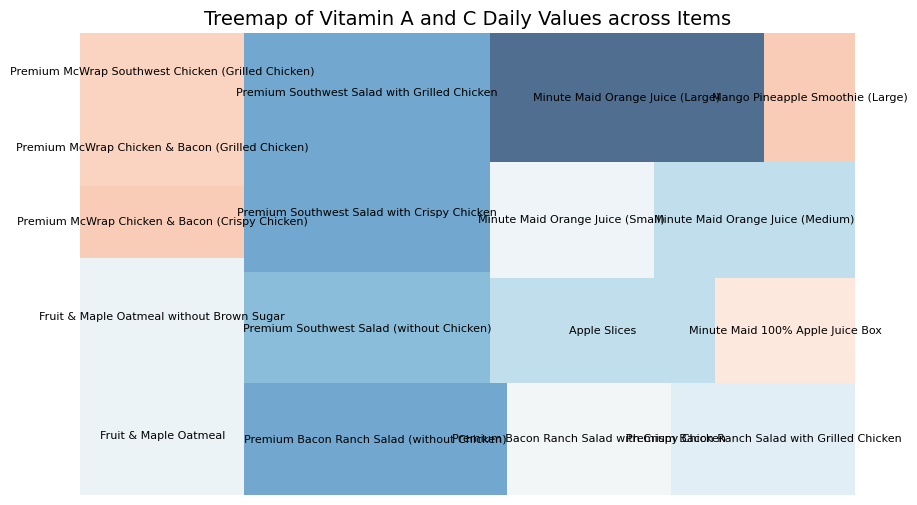

In [33]:
import matplotlib.pyplot as plt
import squarify

# Set the font to 'DejaVu Sans' which usually supports a wide range of glyphs
plt.rcParams['font.family'] = 'DejaVu Sans'

# Your plotting code (e.g., treemap)
# Create a treemap
plt.figure(figsize=(10, 6))
squarify.plot(sizes=filtered_values, label=filtered_items, alpha=0.7, color=plt.cm.RdBu(filtered_values / max(filtered_values)), text_kwargs={'fontsize': 8})

# Set plot title
plt.title("Treemap of Vitamin A and C Daily Values across Items", fontsize=14)
plt.axis('off')  # No axes for the treemap

# Show plot
plt.show()


**4.Distribution of Saturated Fat vs. Trans Fat**

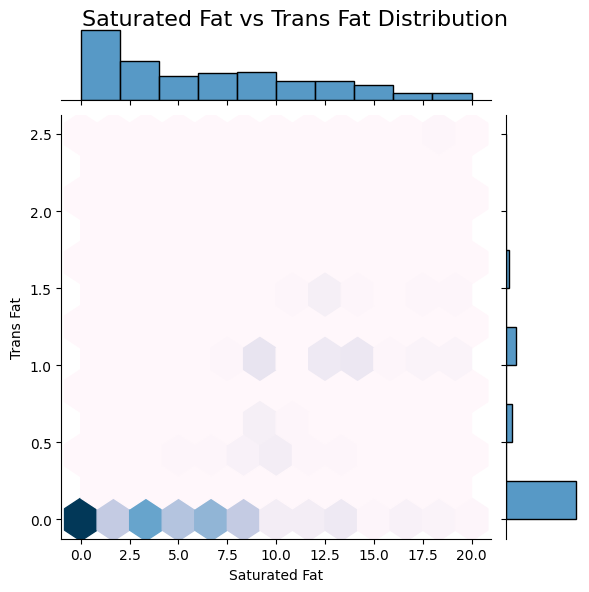

In [34]:
import seaborn as sns
import matplotlib.pyplot as plt
# Create the joint plot
g = sns.jointplot(x='Saturated Fat', y='Trans Fat', data=menu_df, kind='hex', cmap='PuBu')

# Add title to the joint plot
g.fig.suptitle('Saturated Fat vs Trans Fat Distribution', fontsize=16)

# Adjust title position so it doesn't overlap with the plot
g.fig.subplots_adjust(top=0.95)

# Show plot
plt.show()



**5 Distribution of Fiber Content**

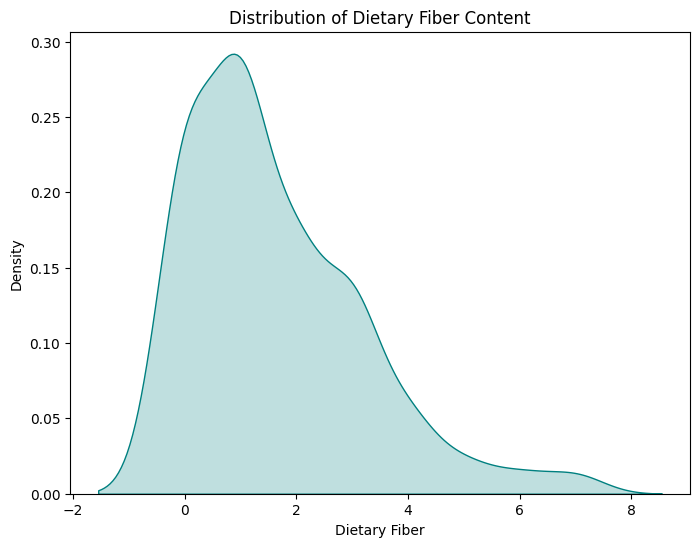

In [35]:
# KDE plot for Dietary Fiber distribution
plt.figure(figsize=(8,6))
sns.kdeplot(menu_df['Dietary Fiber'], fill=True, color='teal')
plt.title('Distribution of Dietary Fiber Content')
plt.xlabel('Dietary Fiber')
plt.show()


**Advanced Analysis for sales.csv**

**1. Sales, Profit, and Discount by Sub-Category**

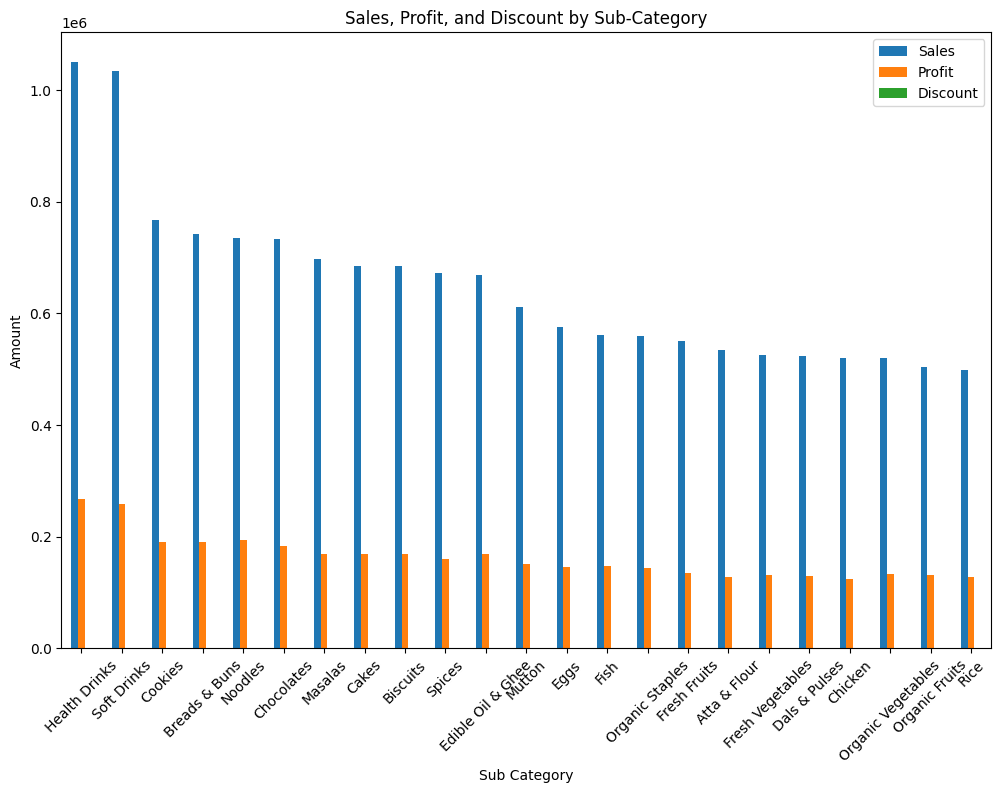

In [36]:
sales_df = pd.read_csv(r"C:\Users\Rohan\Desktop\Datasets\Supermart Grocery Sales - Retail Analytics Dataset.csv" , encoding='unicode_escape')
# Grouped bar plot for Sales, Profit, and Discount by Sub-Category
sales_by_subcategory = sales_df.groupby('Sub Category')[['Sales', 'Profit', 'Discount']].sum().sort_values(by='Sales', ascending=False).reset_index()

sales_by_subcategory.plot(x='Sub Category', y=['Sales', 'Profit', 'Discount'], kind='bar', figsize=(12,8))
plt.title('Sales, Profit, and Discount by Sub-Category')
plt.ylabel('Amount')
plt.xticks(rotation=45)
plt.show()


**2. Interactive Treemap for Sales by Category and Sub-Category**

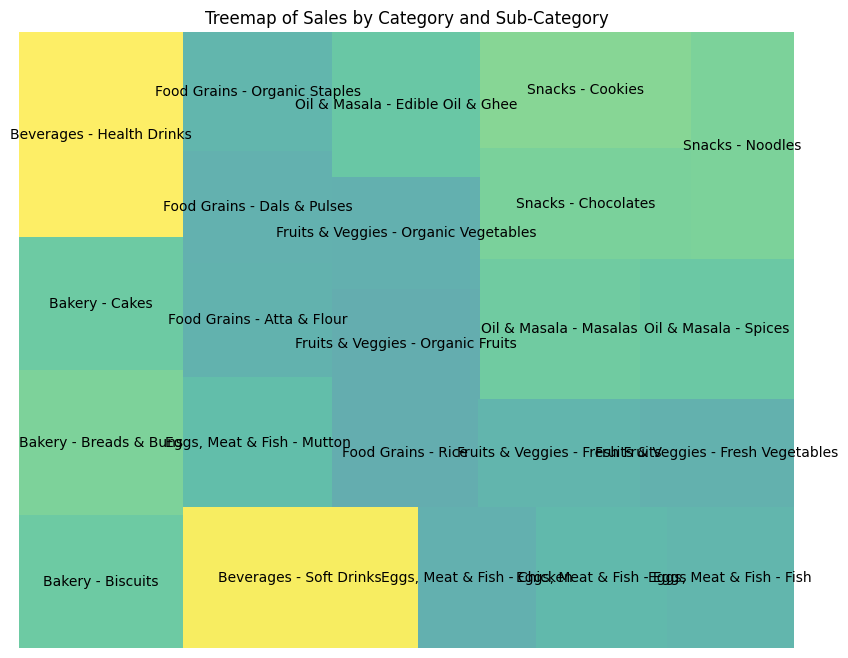

In [37]:
import matplotlib.pyplot as plt
import squarify
import pandas as pd

# Aggregate sales by category and sub-category
category_sales = sales_df.groupby(['Category', 'Sub Category']).agg({'Sales': 'sum'}).reset_index()

# Prepare data for the treemap
labels = category_sales['Category'] + ' - ' + category_sales['Sub Category']
sizes = category_sales['Sales']

# Create the treemap
plt.figure(figsize=(10, 8))
squarify.plot(sizes=sizes, label=labels, alpha=0.7, color=plt.cm.viridis(sizes / max(sizes)), text_kwargs={'fontsize': 10})

# Set plot title and other parameters
plt.title("Treemap of Sales by Category and Sub-Category")
plt.axis('off')  # Hide axes for better visual
plt.show()


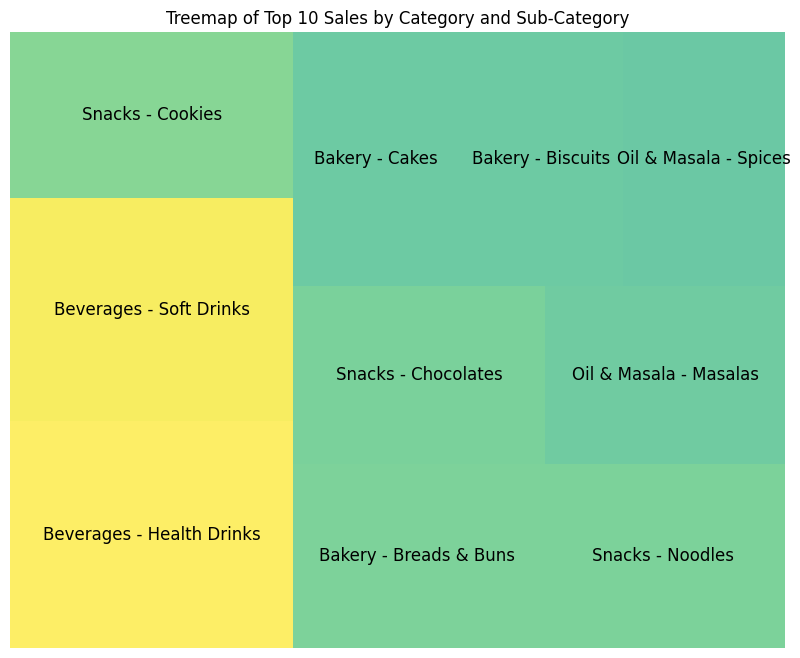

In [38]:
# Sort and filter to show top 10 sales categories/sub-categories
top_category_sales = category_sales.sort_values(by='Sales', ascending=False).head(10)

# Prepare the filtered data
labels = top_category_sales['Category'] + ' - ' + top_category_sales['Sub Category']
sizes = top_category_sales['Sales']

# Create the treemap
plt.figure(figsize=(10, 8))
squarify.plot(sizes=sizes, label=labels, alpha=0.7, color=plt.cm.viridis(sizes / max(sizes)), text_kwargs={'fontsize': 12})

# Set plot title and other parameters
plt.title("Treemap of Top 10 Sales by Category and Sub-Category")
plt.axis('off')  # Hide axes for better visual
plt.show()


**3. Time Series: Sales and Profit over Time**

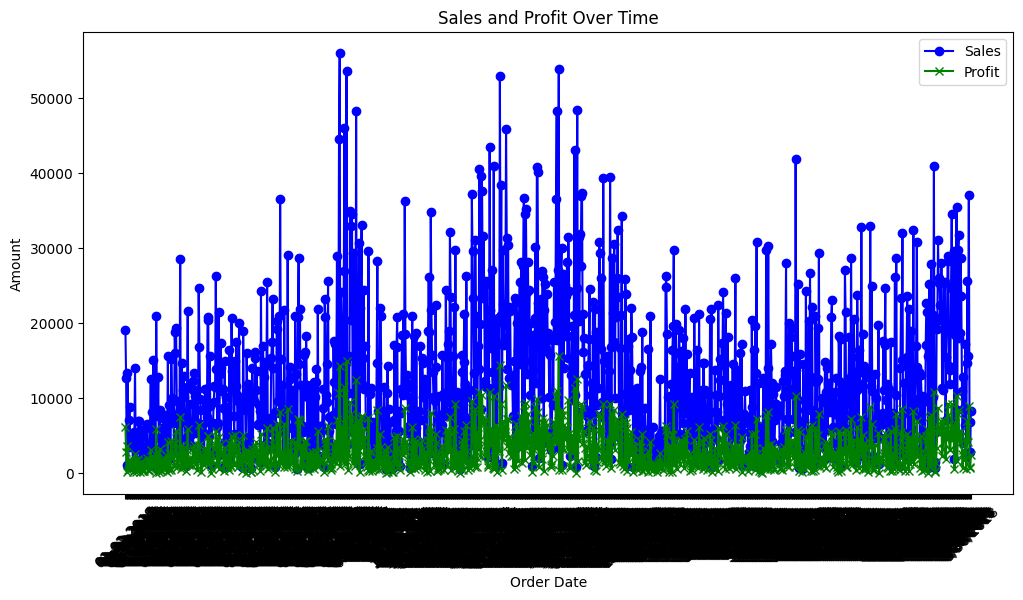

In [39]:
# Group data by Order Date and sum Sales and Profit
time_series_data = sales_df.groupby('Order Date')[['Sales', 'Profit']].sum().reset_index()

plt.figure(figsize=(12,6))
plt.plot(time_series_data['Order Date'], time_series_data['Sales'], label='Sales', color='blue', marker='o')
plt.plot(time_series_data['Order Date'], time_series_data['Profit'], label='Profit', color='green', marker='x')
plt.title('Sales and Profit Over Time')
plt.xlabel('Order Date')
plt.ylabel('Amount')
plt.legend()
plt.xticks(rotation=45)
plt.show()


**4. Heatmap of Sales and Profit by Region and State**

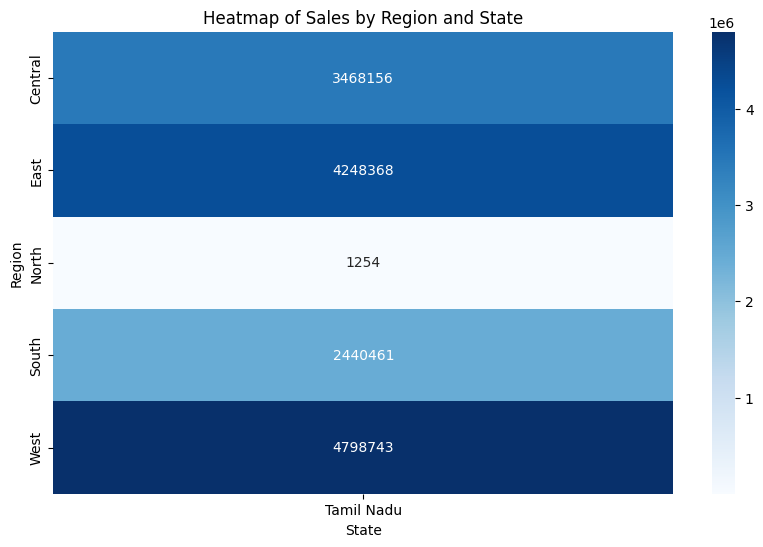

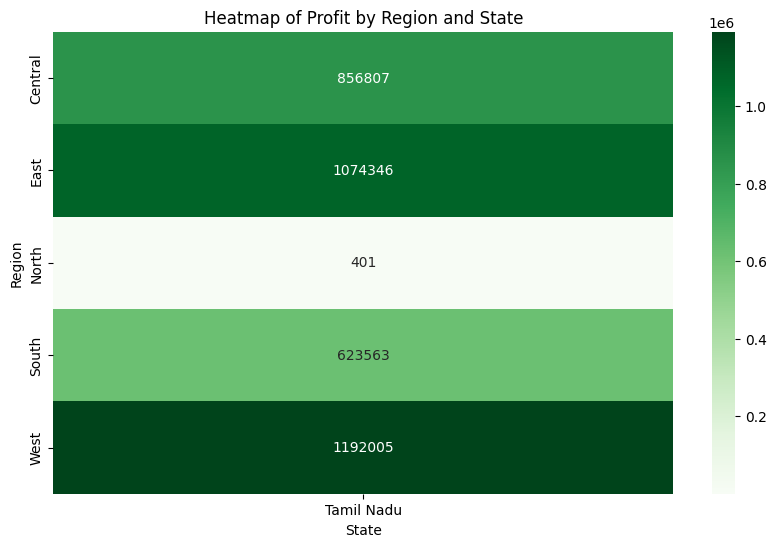

In [40]:
# Pivot table for Sales and Profit by Region and State
heatmap_data = sales_df.pivot_table(values=['Sales', 'Profit'], index='Region', columns='State', aggfunc='sum')

# Heatmap for Sales
plt.figure(figsize=(10,6))
sns.heatmap(heatmap_data['Sales'], cmap='Blues', annot=True, fmt='.0f')
plt.title('Heatmap of Sales by Region and State')
plt.show()

# Heatmap for Profit
plt.figure(figsize=(10,6))
sns.heatmap(heatmap_data['Profit'], cmap='Greens', annot=True, fmt='.0f')
plt.title('Heatmap of Profit by Region and State')
plt.show()


**5. Word Cloud for Most Common Categories and Sub-Categories**

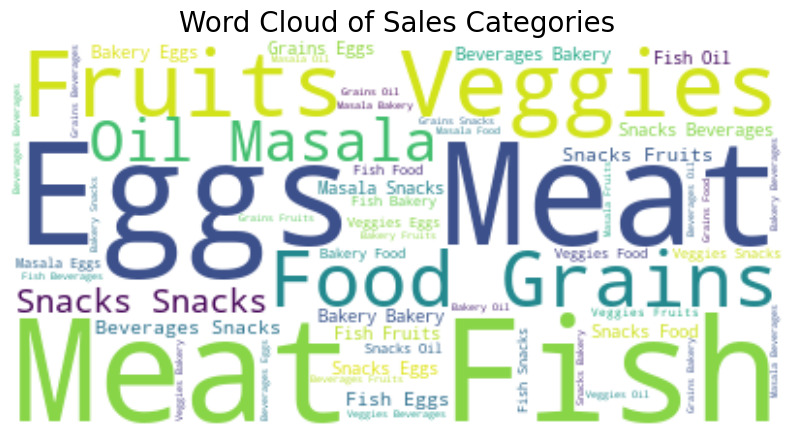

In [42]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Word cloud for Categories
wordcloud = WordCloud(background_color='white', colormap='viridis').generate(' '.join(sales_df['Category']))

# Display the word cloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # Hide axes
plt.title('Word Cloud of Sales Categories', fontsize=20)
plt.show()


**6. Sales Distribution by City (Top 10 Cities)**

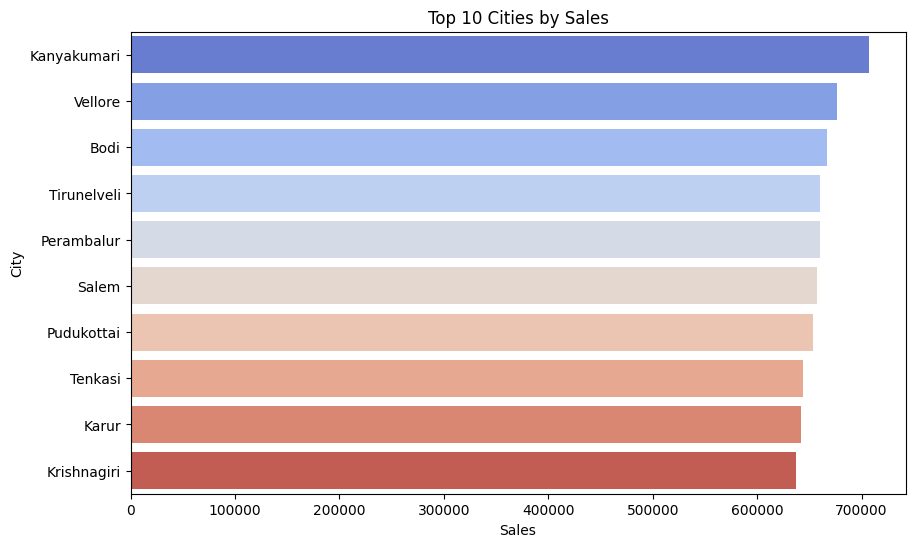

In [43]:
import matplotlib.pyplot as plt
import seaborn as sns

# Bar plot for top 10 cities by Sales
top_cities = sales_df.groupby('City')['Sales'].sum().nlargest(10).reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(x='Sales', y='City', data=top_cities, hue='City', palette='coolwarm', legend=False)
plt.title('Top 10 Cities by Sales')
plt.xlabel('Sales')
plt.ylabel('City')
plt.show()



**Categorical Analysis**

**1. Sales Distribution by Category and Region**

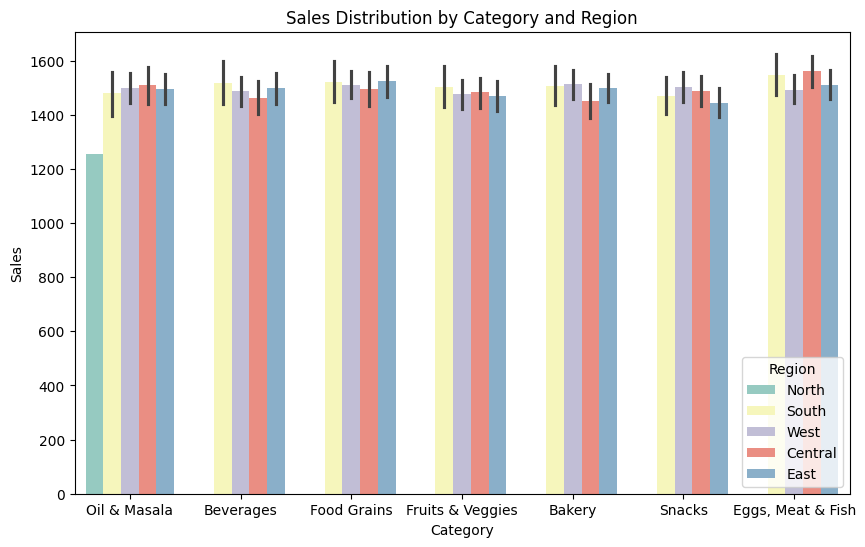

In [44]:
# Bar plot for Sales by Category and Region
plt.figure(figsize=(10,6))
sns.barplot(x='Category', y='Sales', hue='Region', data=sales_df, palette='Set3')
plt.title('Sales Distribution by Category and Region')
plt.show()


**2. Profit Margin by Sub-Category**

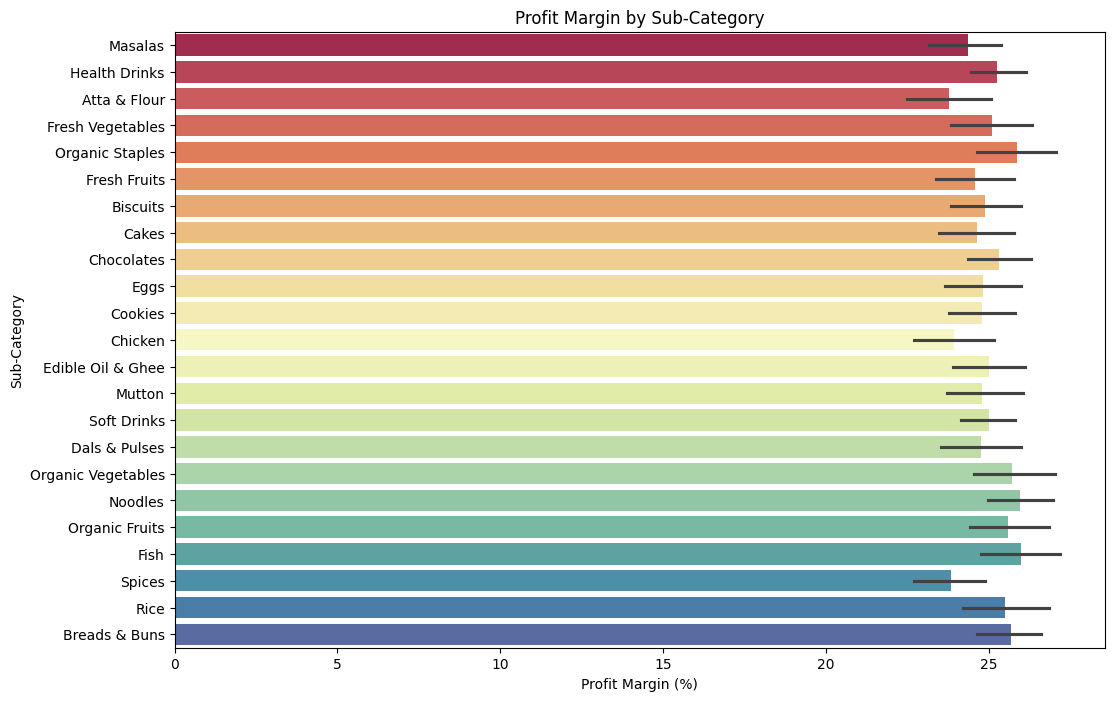

In [45]:
# Calculate profit margin
sales_df['Profit Margin (%)'] = (sales_df['Profit'] / sales_df['Sales']) * 100

# Bar plot for profit margin by Sub-Category
plt.figure(figsize=(12,8))
sns.barplot(x='Profit Margin (%)', y='Sub Category', hue='Sub Category', data=sales_df, palette='Spectral')
plt.title('Profit Margin by Sub-Category')
plt.xlabel('Profit Margin (%)')
plt.ylabel('Sub-Category')
plt.show()


**Interactive Visualizations with Bokeh**

**1. Interactive Line Chart for Sales and Profit Over Time**

In [47]:
from bokeh.plotting import figure, show
from bokeh.io import output_notebook
from bokeh.models import ColumnDataSource

# Prepare time series data
time_series_data = sales_df.groupby('Order Date')[['Sales', 'Profit']].sum().reset_index()

# Output to notebook
output_notebook()

# Create a ColumnDataSource
source = ColumnDataSource(time_series_data)

# Create a line chart
p = figure(title="Sales and Profit Over Time", 
           x_axis_label='Order Date', 
           y_axis_label='Amount',
           x_axis_type='datetime', 
           height=400, 
           width=800)  # Changed plot_height and plot_width to height and width

# Add lines for Sales and Profit
p.line('Order Date', 'Sales', source=source, legend_label='Sales', line_width=2, color='blue')
p.line('Order Date', 'Profit', source=source, legend_label='Profit', line_width=2, color='green')

# Customize legend
p.legend.location = "top_left"
p.legend.click_policy = "hide"

# Show the plot
show(p)



Loading BokehJS ...

In [48]:
import bokeh
print(bokeh.__version__)


3.6.2


In [49]:
import pandas as pd
from bokeh.plotting import figure, show
from bokeh.io import output_notebook
from bokeh.models import ColumnDataSource
sales_df = pd.read_csv(r"C:\Users\Rohan\Desktop\Datasets\Supermart Grocery Sales - Retail Analytics Dataset.csv" , encoding='unicode_escape')


# Prepare time series data
time_series_data = sales_df.groupby('Order Date')[['Sales', 'Profit']].sum().reset_index()

# Output to notebook
output_notebook()

# Create a ColumnDataSource
source = ColumnDataSource(time_series_data)

# Create a line chart
p = figure(title="Sales and Profit Over Time", 
           x_axis_label='Order Date', 
           y_axis_label='Amount',
           x_axis_type='datetime', 
           height=400, 
           width=800)  # Changed plot_height and plot_width to height and width

# Add lines for Sales and Profit
p.line('Order Date', 'Sales', source=source, legend_label='Sales', line_width=2, color='blue')
p.line('Order Date', 'Profit', source=source, legend_label='Profit', line_width=2, color='green')

# Customize legend
p.legend.location = "top_left"
p.legend.click_policy = "hide"

# Show the plot
show(p)


Loading BokehJS ...

In [51]:
import altair as alt
import pandas as pd

# Prepare time series data
time_series_data = sales_df.groupby('Order Date')[['Sales', 'Profit']].sum().reset_index()

# Create an interactive line chart
line_chart = alt.Chart(time_series_data).transform_fold(
    ['Sales', 'Profit'],
    as_=['Metric', 'Amount']
).mark_line().encode(
    x=alt.X('Order Date:T', title='Order Date'),
    y=alt.Y('Amount:Q', title='Amount'),
    color='Metric:N',
    tooltip=['Metric:N', 'Amount:Q']
).properties(
    title='Sales and Profit Over Time',
    width=800,
    height=400
)

# Show the chart
line_chart


alt.Chart(...)

**2. Interactive Bar Chart for Sales by State**

In [52]:
# Prepare data for Sales by State
sales_by_state = sales_df.groupby('State')['Sales'].sum().reset_index().nlargest(10, 'Sales')

# Create an interactive bar chart
bar_chart = alt.Chart(sales_by_state).mark_bar().encode(
    x=alt.X('Sales:Q', title='Sales'),
    y=alt.Y('State:N', title='State'),
    color='State:N'
).properties(
    title='Sales by State',
    width=600,
    height=400
)

# Show the chart
bar_chart


alt.Chart(...)